In [1]:
#importing libarary

import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")



In [2]:
diabetes=pd.read_csv('csv/diabetes.csv')
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Here we will be reading the dataset which is in the CSV format


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [5]:
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
diabetes.shape


(768, 9)

In [7]:
diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
plt.figure(figsize=(20,10),facecolor='w')
plotno=1
for col in diabetes:
    if plotno<=8:
        plt.subplot(3,4,plotno)
        sns.distplot(diabetes[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()

In [10]:
#rearranging data

diabetes['BMI']=diabetes['BMI'].replace(0,diabetes['BMI'].mean())
diabetes['BloodPressure']=diabetes['BloodPressure'].replace(0,diabetes['BloodPressure'].mean())
diabetes['Glucose']=diabetes['Glucose'].replace(0,diabetes['Glucose'].mean())
diabetes['Insulin']=diabetes['Insulin'].replace(0,diabetes['Insulin'].mean())
diabetes['SkinThickness']=diabetes['SkinThickness'].replace(0,diabetes['SkinThickness'].mean())

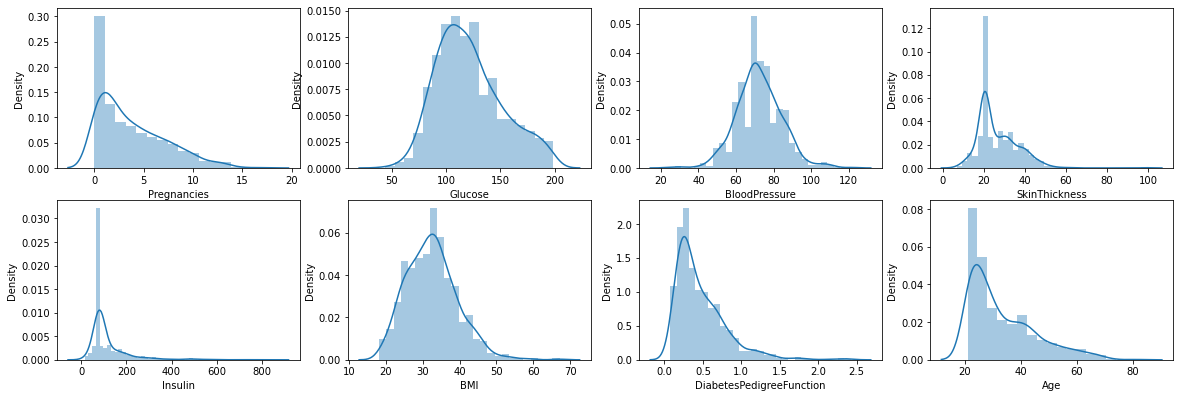

In [11]:
plt.figure(figsize=(20,10),facecolor='w')
plotno=1
for col in diabetes:
    if plotno<=8:
        plt.subplot(3,4,plotno)
        sns.distplot(diabetes[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()

In [12]:
df_features=diabetes.drop('Outcome',axis=1)

In [13]:
# Visulize the outliers using boxplot
plt.figure(figsize=(15,20))
plotno=1
for col in df_features:
    if plotno<=30:
        plt.subplot(10,3,plotno)
        sns.boxplot(df_features[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()

In [14]:
#find the IQR to identify the outliers

#1st quartile
q1=diabetes.quantile(0.25)
q3=diabetes.quantile(0.75)

#IQR
iqr=q3-q1

In [15]:


#Outlier detection formula higher side ==>q3+(1.5IQR) lower side == q1-(1.5IQR)

#Validating the outlier
preg_high = (q3.Pregnancies+(1.5*iqr.Pregnancies))
preg_high

#13.5

index=np.where(diabetes['Pregnancies']>preg_high)
index

#(array([ 88, 159, 298, 455], dtype=int64),)

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

#(764, 9)

diabetes.reset_index()



index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        4            0    137.0           40.0      35.000000  168.000000   
..     ...          ...      ...            ...            ...         ...   
759    763           10    101.0           76.0      48.000000  180.000000   
760    764            2    122.0           70.0      27.000000   79.799479   
761    765            5    121.0           72.0      23.000000  112.000000   
762    766            1    126.0           60.0      20.536458   79.799479   
763    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    43.1                     2.288   33        1  
..    ...                       ...  ...      ...  
759  32.9                     0.171   63        0  
760  36.8                     0.340   27        0  
761  26.2                     0.245   30        0  
762  30.1                     0.349   47        1  
763  30.4                     0.315   23        0  

[764 rows x 10 columns]

In [16]:
bp_high=(q3.BloodPressure+(1.5*iqr.BloodPressure))
bp_high

104.0

In [17]:
index=np.where(diabetes['BloodPressure']>bp_high)
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [18]:
diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

(754, 9)

In [19]:
diabetes.reset_index()

index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        4            0    137.0           40.0      35.000000  168.000000   
..     ...          ...      ...            ...            ...         ...   
749    763           10    101.0           76.0      48.000000  180.000000   
750    764            2    122.0           70.0      27.000000   79.799479   
751    765            5    121.0           72.0      23.000000  112.000000   
752    766            1    126.0           60.0      20.536458   79.799479   
753    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    43.1                     2.288   33        1  
..    ...                       ...  ...      ...  
749  32.9                     0.171   63        0  
750  36.8                     0.340   27        0  
751  26.2                     0.245   30        0  
752  30.1                     0.349   47        1  
753  30.4                     0.315   23        0  

[754 rows x 10 columns]

In [20]:
st_high=(q3.SkinThickness+(1.5*iqr.SkinThickness))
print(st_high)

index=np.where(diabetes['SkinThickness']>st_high)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

49.1953125


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        4            0    137.0           40.0      35.000000  168.000000   
..     ...          ...      ...            ...            ...         ...   
737    763           10    101.0           76.0      48.000000  180.000000   
738    764            2    122.0           70.0      27.000000   79.799479   
739    765            5    121.0           72.0      23.000000  112.000000   
740    766            1    126.0           60.0      20.536458   79.799479   
741    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    43.1                     2.288   33        1  
..    ...                       ...  ...      ...  
737  32.9                     0.171   63        0  
738  36.8                     0.340   27        0  
739  26.2                     0.245   30        0  
740  30.1                     0.349   47        1  
741  30.4                     0.315   23        0  

[742 rows x 10 columns]

In [21]:
insu_high=(q3.Insulin+(1.5*iqr.Insulin))
print(insu_high)

index=np.where(diabetes['Insulin']>insu_high)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

198.42578125


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        4            0    137.0           40.0      35.000000  168.000000   
..     ...          ...      ...            ...            ...         ...   
652    763           10    101.0           76.0      48.000000  180.000000   
653    764            2    122.0           70.0      27.000000   79.799479   
654    765            5    121.0           72.0      23.000000  112.000000   
655    766            1    126.0           60.0      20.536458   79.799479   
656    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    43.1                     2.288   33        1  
..    ...                       ...  ...      ...  
652  32.9                     0.171   63        0  
653  36.8                     0.340   27        0  
654  26.2                     0.245   30        0  
655  30.1                     0.349   47        1  
656  30.4                     0.315   23        0  

[657 rows x 10 columns]

In [22]:
BMI_high=(q3.BMI+(1.5*iqr.BMI))
print(BMI_high)

index=np.where(diabetes['BMI']>BMI_high)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

50.25


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        4            0    137.0           40.0      35.000000  168.000000   
..     ...          ...      ...            ...            ...         ...   
649    763           10    101.0           76.0      48.000000  180.000000   
650    764            2    122.0           70.0      27.000000   79.799479   
651    765            5    121.0           72.0      23.000000  112.000000   
652    766            1    126.0           60.0      20.536458   79.799479   
653    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    43.1                     2.288   33        1  
..    ...                       ...  ...      ...  
649  32.9                     0.171   63        0  
650  36.8                     0.340   27        0  
651  26.2                     0.245   30        0  
652  30.1                     0.349   47        1  
653  30.4                     0.315   23        0  

[654 rows x 10 columns]

In [23]:
dpf_high=(q3.DiabetesPedigreeFunction+(1.5*iqr.DiabetesPedigreeFunction))
print(dpf_high)

index=np.where(diabetes['DiabetesPedigreeFunction']>dpf_high)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

1.2


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        5            5    116.0           74.0      20.536458   79.799479   
..     ...          ...      ...            ...            ...         ...   
626    763           10    101.0           76.0      48.000000  180.000000   
627    764            2    122.0           70.0      27.000000   79.799479   
628    765            5    121.0           72.0      23.000000  112.000000   
629    766            1    126.0           60.0      20.536458   79.799479   
630    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    25.6                     0.201   30        0  
..    ...                       ...  ...      ...  
626  32.9                     0.171   63        0  
627  36.8                     0.340   27        0  
628  26.2                     0.245   30        0  
629  30.1                     0.349   47        1  
630  30.4                     0.315   23        0  

[631 rows x 10 columns]

In [24]:
age_high=(q3.Age+(1.5*iqr.Age))
print(age_high)

index=np.where(diabetes['Age']>age_high)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

66.5


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        5            5    116.0           74.0      20.536458   79.799479   
..     ...          ...      ...            ...            ...         ...   
617    763           10    101.0           76.0      48.000000  180.000000   
618    764            2    122.0           70.0      27.000000   79.799479   
619    765            5    121.0           72.0      23.000000  112.000000   
620    766            1    126.0           60.0      20.536458   79.799479   
621    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    25.6                     0.201   30        0  
..    ...                       ...  ...      ...  
617  32.9                     0.171   63        0  
618  36.8                     0.340   27        0  
619  26.2                     0.245   30        0  
620  30.1                     0.349   47        1  
621  30.4                     0.315   23        0  

[622 rows x 10 columns]

In [25]:
bp_low=(q1.BloodPressure-(1.5*iqr.BloodPressure))
print(bp_low)

index=np.where(diabetes['BloodPressure']<bp_low)
index

diabetes=diabetes.drop(diabetes.index[index])
diabetes.shape

diabetes.reset_index()

40.0


index  Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0        0            6    148.0           72.0      35.000000   79.799479   
1        1            1     85.0           66.0      29.000000   79.799479   
2        2            8    183.0           64.0      20.536458   79.799479   
3        3            1     89.0           66.0      23.000000   94.000000   
4        5            5    116.0           74.0      20.536458   79.799479   
..     ...          ...      ...            ...            ...         ...   
614    763           10    101.0           76.0      48.000000  180.000000   
615    764            2    122.0           70.0      27.000000   79.799479   
616    765            5    121.0           72.0      23.000000  112.000000   
617    766            1    126.0           60.0      20.536458   79.799479   
618    767            1     93.0           70.0      31.000000   79.799479   

      BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.6                     0.627   50        1  
1    26.6                     0.351   31        0  
2    23.3                     0.672   32        1  
3    28.1                     0.167   21        0  
4    25.6                     0.201   30        0  
..    ...                       ...  ...      ...  
614  32.9                     0.171   63        0  
615  36.8                     0.340   27        0  
616  26.2                     0.245   30        0  
617  30.1                     0.349   47        1  
618  30.4                     0.315   23        0  

[619 rows x 10 columns]

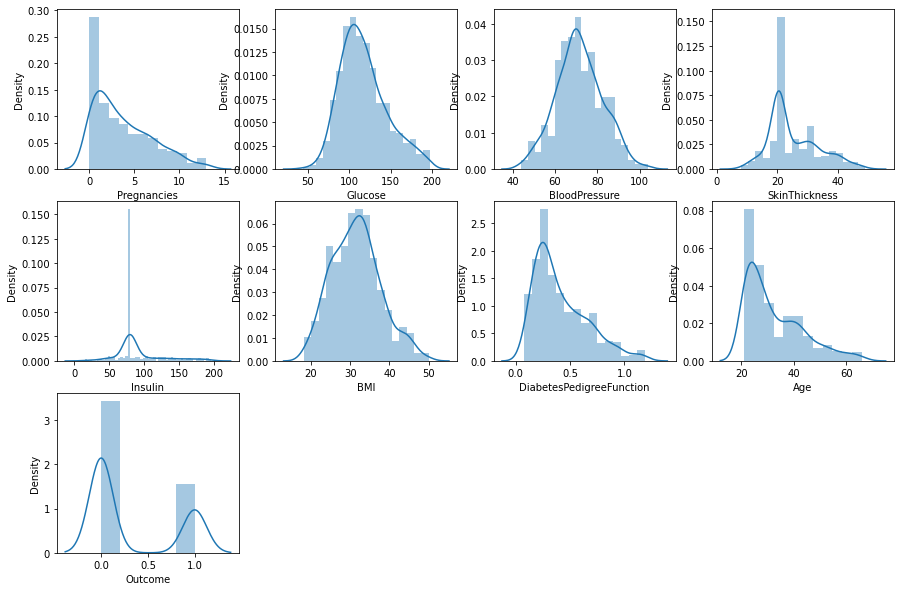

In [26]:
# Visulize the outliers using boxplot
plt.figure(figsize=(15,10))
plotno=1
for col in diabetes:
    if plotno<=9:
        plt.subplot(3,4,plotno)
        sns.distplot(diabetes[col])
        plt.xlabel(col,fontsize=10)
    plotno+=1
plt.show()



In [27]:
x=diabetes.drop(columns='Outcome')
y=diabetes['Outcome']

In [28]:
x

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
5              5    116.0           74.0      20.536458   79.799479  25.6   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  
2                       0.672   32  
3                       0.167   21  
5                       0.201   30  
..                        ...  ...  
763                     0.171   63  
764                     0.340   27  
765                     0.245   30  
766                     0.349   47  
767                     0.315   23  

[619 rows x 8 columns]

In [29]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 619, dtype: int64

In [30]:

#stripplot - we use to find the relaton between dependent& independent variables

plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in x:
    if plotno<=8:
        ax=plt.subplot(3,3,plotno)
        sns.stripplot(y,x[col])
        plt.xlabel(col)  
    plotno+=1
plt.show()
    



In [31]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

#for the normalization

In [32]:
scaler

StandardScaler()

In [33]:
x_scaled

array([[ 0.68261737,  1.09175498,  0.03430374, ...,  0.3291024 ,
         0.86092316,  1.59493212],
       [-0.86628347, -1.14945302, -0.51362487, ..., -0.79544459,
        -0.26714798, -0.1367884 ],
       [ 1.3021777 ,  2.33687054, -0.69626775, ..., -1.32558817,
         1.0448478 , -0.04564521],
       ...,
       [ 0.3728372 ,  0.13123727,  0.03430374, ..., -0.85970442,
        -0.7003927 , -0.22793158],
       [-0.86628347,  0.30911092, -1.06155349, ..., -0.2331711 ,
        -0.27532241,  1.32150256],
       [-0.86628347, -0.86485518, -0.14833913, ..., -0.18497622,
        -0.4142877 , -0.86593388]])

In [34]:
x_scaled.shape[1]

8

In [35]:
#Finding the multicollinerity
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"]=x.columns

#let's check the values
vif

vif                  Features
0  1.448654               Pregnancies
1  1.250247                   Glucose
2  1.258898             BloodPressure
3  1.411508             SkinThickness
4  1.200759                   Insulin
5  1.447599                       BMI
6  1.038530  DiabetesPedigreeFunction
7  1.659799                       Age

In [36]:
#vif values less than 5 that's means no multicollinearly

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.25,random_state=355)

In [38]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [39]:
import pickle
#writng diffrent model file to file
with open('modeFordiabetesPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [40]:
y_pred=log_reg.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7612903225806451

In [42]:
# load saved model
with open('modeForPrediction.sav' , 'rb') as f:
    lr = pickle.load(f)

with open('sandardScalar.sav' , 'rb') as f:
    sr = pickle.load(f)

In [43]:
lr.predict(x_test)
#sr.predict(x_test)

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0], dtype=int64)

#Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [44]:
inputt=[6 ,148.0 ,72.0 ,35.000000 ,79.799479 ,33.6 ,0.627 ,50]
inputt2=[1 ,85.0 ,66.0 ,29.000000 ,79.799479 ,26.6 ,0.351 ,31]
#inputt.reshape[-1,1]
z=log_reg.predict([inputt2,inputt,[0,43,99,78,78,34,1,5]])

In [45]:
z

array([1, 1, 1], dtype=int64)

In [46]:
diabetes.head()


Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin   BMI  \
0            6    148.0           72.0      35.000000  79.799479  33.6   
1            1     85.0           66.0      29.000000  79.799479  26.6   
2            8    183.0           64.0      20.536458  79.799479  23.3   
3            1     89.0           66.0      23.000000  94.000000  28.1   
5            5    116.0           74.0      20.536458  79.799479  25.6   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
5                     0.201   30        0

In [47]:
check=[[1,14800 ,72.0 ,35.000000 ,79.799479,33.6 ,5 ,50 ],[1,85.0,66.0 ,29.000000 ,79.799479 ,26.6 ,78 ,31]]

In [48]:
log_reg.predict(check)

array([1, 1], dtype=int64)

In [49]:
lr.predict(check)

array([1, 1], dtype=int64)